**Customer Satisfaction Analysis using Machine Learning and Sentiment Analysis**

Importing the necessary Libraries

In [20]:
import pandas as pd
import string

from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


Reading Data

In [21]:
revs_df = pd.read_csv("/content/Hotel_Reviews.csv")

In [22]:
revs_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Appending Positive reviews to Negative reviews

In [23]:
revs_df["review"] = revs_df["Negative_Review"] + revs_df["Positive_Review"]

Label Creation

In [24]:
revs_df["is_bad_review"] = revs_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

Selection of Relevant Columns

In [25]:
revs_df = revs_df[["review", "is_bad_review"]]
revs_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


Sampling the Data

In [26]:
revs_df = revs_df.sample(frac = 0.1, replace = False, random_state=42)

Data Cleaning

Removing 'No Negative' or 'No Positive' from text the dataframe as  they are same as Positive and Negative

In [27]:
revs_df["review"] = revs_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

Returning the wordnet object value corresponding to POS tag

In [28]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Clean text

In [29]:
def clean_text_old(text):
    # converting text to lower case
    text = text.lower()

    # text tokenization and punctuation removal
    text = [word.strip(string.punctuation) for word in text.split(" ")]

    # removing words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]

    # removal of stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]

    # removing empty tokens
    text = [t for t in text if len(t) > 0]

    # pos tag text
    pos_tags = pos_tag(text)

    # lemmatization
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

    # remove words having only 1 letter
    text = [t for t in text if len(t) > 1]

    # joining all
    text = " ".join(text)
    return(text)

# Import the necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# # # 1. Handling Imbalanced Data (SMOTE)
# # # Instantiate SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to balance the dataset
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Bi-gram and Tri-gram Analysis
# Modify the clean_text function to include bi-grams and tri-grams
def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]

    # Add bi-grams and tri-grams
    bigrams_trigrams = list(zip(text, text[1:], text[2:]))
    text += [' '.join(bigram) for bigram in bigrams_trigrams]

    text = " ".join(text)
    return text

In [30]:
revs_df.head()

,review,is_bad_review
488440,Would have appreciated a shop in the hotel th...,0
274649,No tissue paper box was present at the room,0
374688,Pillows Nice welcoming and service,0
404352,Everything including the nice upgrade The Hot...,0
451596,Lovely hotel v welcoming staff,0


In [31]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Cleaning text data

In [32]:
revs_df["review_clean"] = revs_df["review"].apply(lambda x: clean_text(x))

In [33]:
revs_df.head()

,review,is_bad_review,review_clean
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the room,0,tissue paper box present room tissue paper box...
374688,Pillows Nice welcoming and service,0,pillow nice welcome service pillow nice welcom...
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff lovely hotel welcom...


# Feature engineering

In [34]:
# Adding Sentimwnt Analysis Columns
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
revs_df["sentiments"] = revs_df["review"].apply(lambda x: sid.polarity_scores(x))
revs_df = pd.concat([revs_df.drop(['sentiments'], axis=1), revs_df['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [35]:
revs_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924
274649,No tissue paper box was present at the room,0,tissue paper box present room tissue paper box...,0.216,0.784,0.000,-0.2960
374688,Pillows Nice welcoming and service,0,pillow nice welcome service pillow nice welcom...,0.000,0.345,0.655,0.6908
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff lovely hotel welcom...,0.000,0.230,0.770,0.7717


- We first start by adding sentiment analysis features because we can guess that customers' reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores.

- For each text, Vader returns 4 values:

    - a neutrality score
    - a positivity score
    - a negativity score
    - an overall score that summarizes the previous scores

- We will integrate those 4 values as features in our dataset.

In [36]:
# adding number of characters column
revs_df["nb_chars"] = revs_df["review"].apply(lambda x: len(x))

# adding number of words column
revs_df["nb_words"] = revs_df["review"].apply(lambda x: len(x.split(" ")))

In [37]:
revs_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113
274649,No tissue paper box was present at the room,0,tissue paper box present room tissue paper box...,0.216,0.784,0.000,-0.2960,44,10
374688,Pillows Nice welcoming and service,0,pillow nice welcome service pillow nice welcom...,0.000,0.345,0.655,0.6908,36,7
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff lovely hotel welcom...,0.000,0.230,0.770,0.7717,32,7


- Next, we add some simple metrics for every text:
    - number of characters in the text
    - number of words in the text

In [38]:
# creating doc2vec vector columns

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(revs_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = revs_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
revs_df = pd.concat([revs_df, doc2vec_df], axis=1)

In [39]:
revs_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.920792,-0.523525,0.775132,-0.930106,0.499638
274649,No tissue paper box was present at the room,0,tissue paper box present room tissue paper box...,0.216,0.784,0.000,-0.2960,44,10,0.041212,0.231514,0.173610,-0.107699,0.206566
374688,Pillows Nice welcoming and service,0,pillow nice welcome service pillow nice welcom...,0.000,0.345,0.655,0.6908,36,7,-0.039063,0.060011,0.302184,-0.198200,0.035344
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,-0.182685,-0.072419,0.384405,-0.350557,0.211732
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff lovely hotel welcom...,0.000,0.230,0.770,0.7717,32,7,0.104227,0.041986,0.196165,-0.270114,-0.144382


- The next step consists in extracting vector representations for every review.

In [40]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(revs_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = revs_df.index
reviews_df = pd.concat([revs_df, tfidf_df], axis=1)

Finally, we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

In [41]:
revs_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.920792,-0.523525,0.775132,-0.930106,0.499638
274649,No tissue paper box was present at the room,0,tissue paper box present room tissue paper box...,0.216,0.784,0.000,-0.2960,44,10,0.041212,0.231514,0.173610,-0.107699,0.206566
374688,Pillows Nice welcoming and service,0,pillow nice welcome service pillow nice welcom...,0.000,0.345,0.655,0.6908,36,7,-0.039063,0.060011,0.302184,-0.198200,0.035344
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,-0.182685,-0.072419,0.384405,-0.350557,0.211732
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff lovely hotel welcom...,0.000,0.230,0.770,0.7717,32,7,0.104227,0.041986,0.196165,-0.270114,-0.144382


In [42]:
revs_df.shape

(51574, 14)

In [43]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.956761
1    0.043239
Name: is_bad_review, dtype: float64

- Our dataset is highly imbalanced because less than 5% of our reviews are considered negative ones. This information will be very useful for the modeling part.

Word Cloud

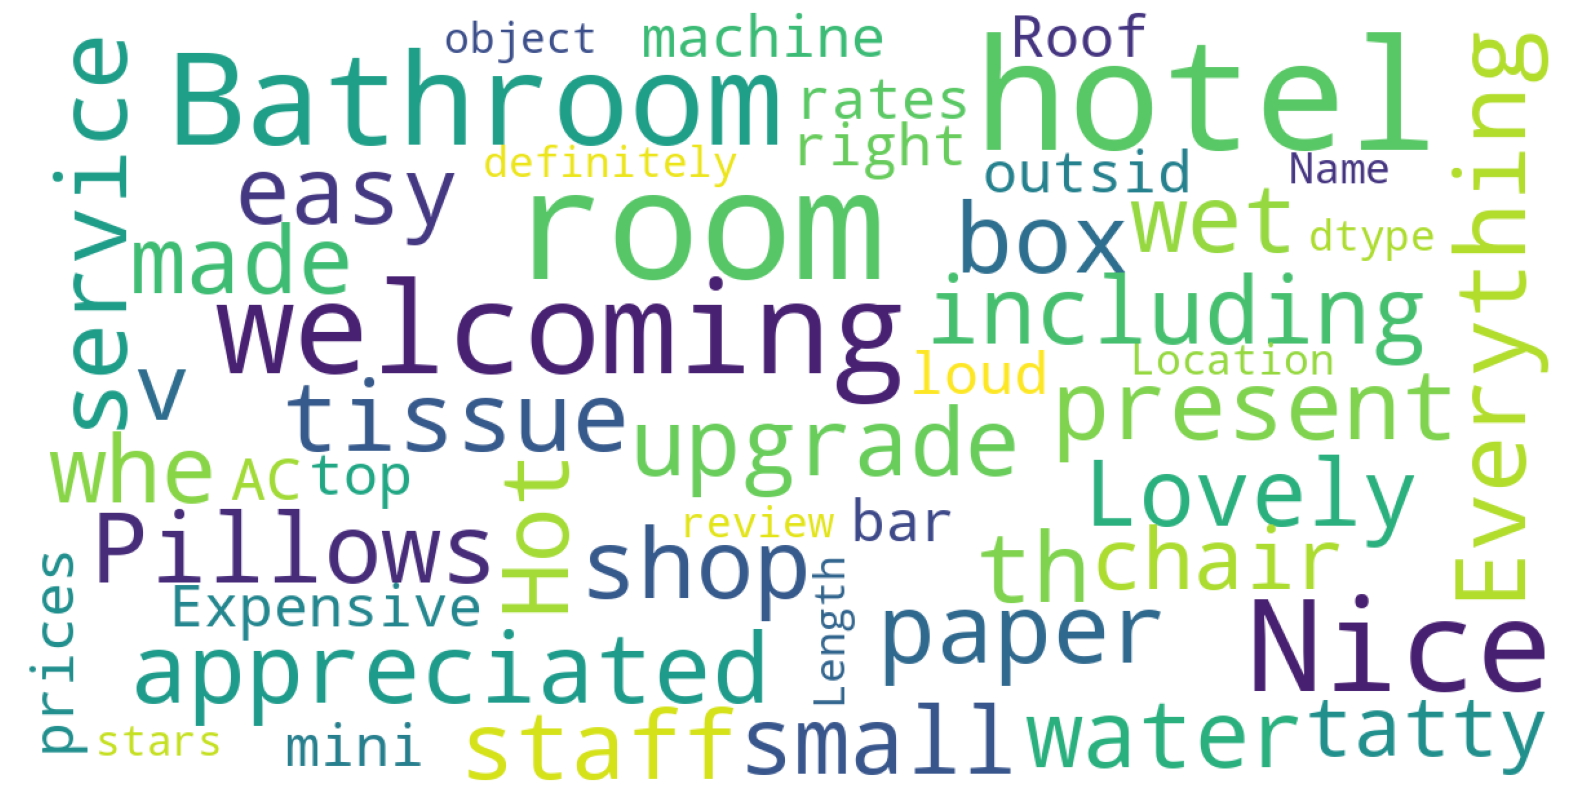

In [44]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(reviews_df["review"])

Highest positive sentiment reviews

In [45]:
revs_df[revs_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
436901,Lovely comfortable rooms,0.877


- The most positive reviews indeed correspond to some good feedbacks.

# Lowest negative sentiment reviews

In [46]:
revs_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
426057,Dirty hotel Smells bad,0.762
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
181508,Window blind was broken,0.744
175316,Nothing Super friendly staff,0.743


Plot sentiment distribution for positive and negative reviews

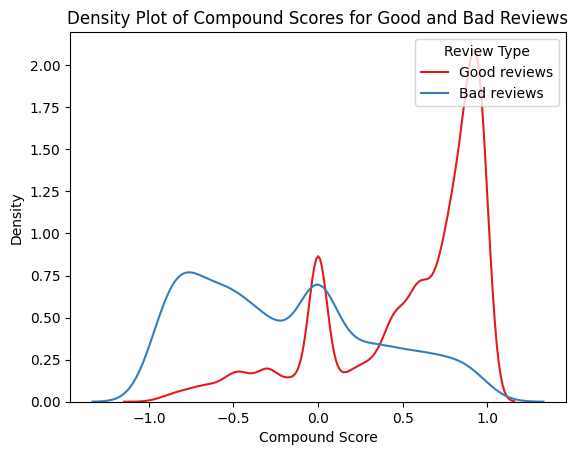

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette for good and bad reviews
colors = sns.color_palette("Set1")

for x, color in zip([0, 1], colors):
    subset = reviews_df[reviews_df['is_bad_review'] == x]

    # density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"

    sns.kdeplot(subset['compound'], color=color, label=label)

# Add legends
plt.legend(title='Review Type', loc='upper right', labels=['Good reviews', 'Bad reviews'])

# Set plot labels and title
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.title('Density Plot of Compound Scores for Good and Bad Reviews')

# Show the plot
plt.show()

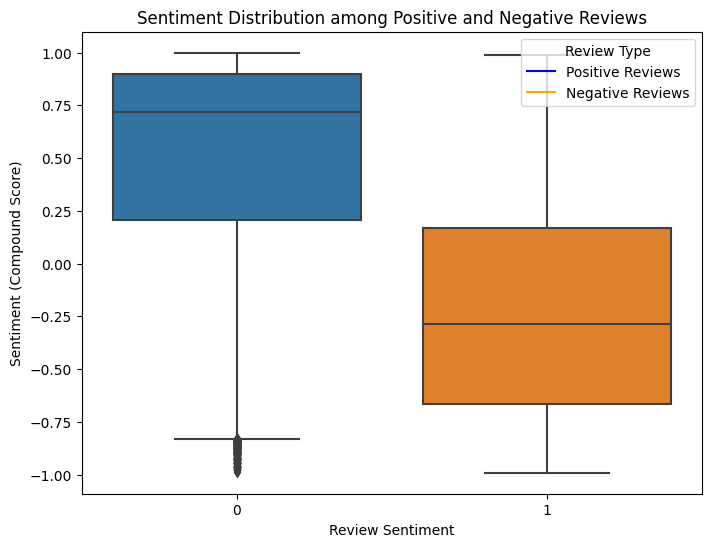

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize the distribution of sentiment scores among positive and negative reviews
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_bad_review', y='compound', data=reviews_df)
plt.xlabel('Review Sentiment')
plt.ylabel('Sentiment (Compound Score)')
plt.title('Sentiment Distribution among Positive and Negative Reviews')

# Add legends
plt.legend(handles=[plt.Line2D([0], [0], color='blue', label='Positive Reviews'),
                    plt.Line2D([0], [0], color='orange', label='Negative Reviews')],
           title='Review Type', loc='upper right')

# Show the plot
plt.show()


- The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. We can see that good reviews are for most of them considered very positive by Vader. On the contrary, bad reviews tend to have lower compound sentiment scores.

- This shows us that previously computed sentiment features will be very important in our modeling part.

# Modeling Reviewer Score

In [48]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in revs_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(revs_df[features], revs_df[label], test_size = 0.20, random_state = 42)

In [49]:
# # 1. Handling Imbalanced Data (SMOTE)
# # Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_train, y_train = smote.fit_resample(X_train, y_train)

- We first choose which features we want to use to train our model. Then we split our data into two parts:

    - one to train our model
    - one to assess its performances
    

- We will next use a Random Forest (RF) classifier for our predictions.

In [50]:
# random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.243707
2,pos,0.181137
0,neg,0.101948
7,doc2vec_vector_1,0.101613
4,nb_chars,0.065910
10,doc2vec_vector_4,0.055496
1,neu,0.054493
8,doc2vec_vector_2,0.054269
9,doc2vec_vector_3,0.047698
5,nb_words,0.046963


- The most important features are indeed the ones that come from the previous sentiment analysis.
- The vector representations of the texts also have a lot of importance in our training.
- Some words appear to have fairly good importance as well.

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.90
Precision: 0.22
Recall: 0.46
F1 Score: 0.30
Confusion Matrix:
[[9126  738]
 [ 244  207]]


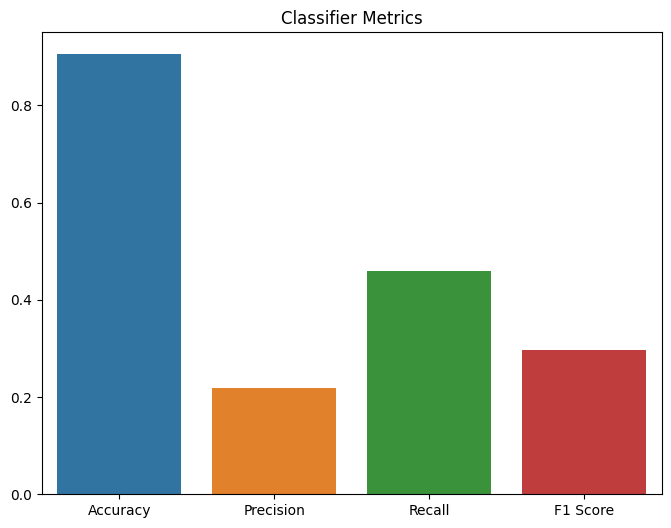

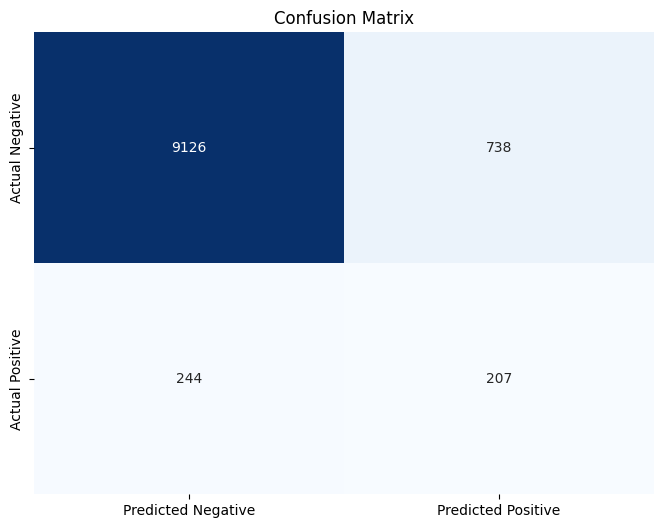

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the metrics
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title("Classifier Metrics")
plt.show()

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.show()


# ROC curve

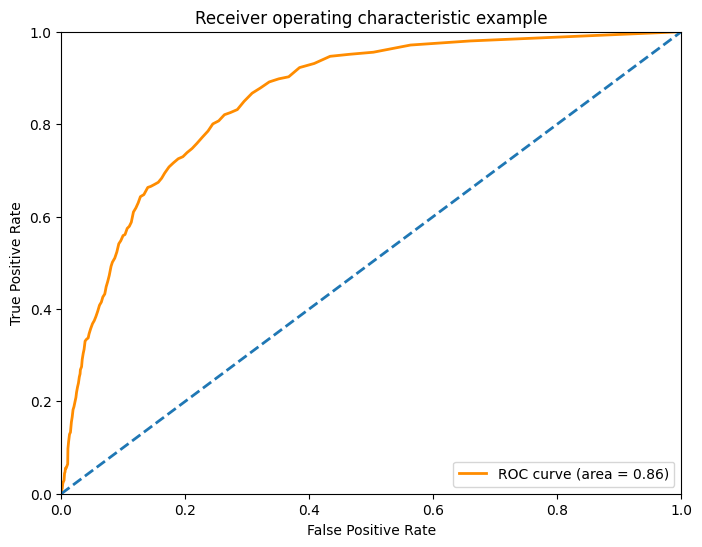

In [62]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# PR(Precision-Recall) curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.21')

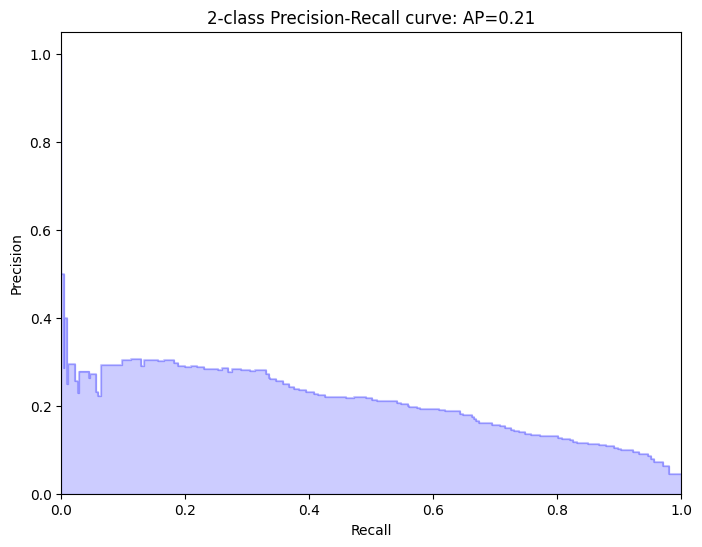

In [63]:
from sklearn.metrics import average_precision_score, precision_recall_curve
#from sklearn.utils.fixes import signature
!pip install funcsigs
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (8, 6))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [55]:
revs_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.920792,-0.523525,0.775132,-0.930106,0.499638
274649,No tissue paper box was present at the room,0,tissue paper box present room tissue paper box...,0.216,0.784,0.000,-0.2960,44,10,0.041212,0.231514,0.173610,-0.107699,0.206566
374688,Pillows Nice welcoming and service,0,pillow nice welcome service pillow nice welcom...,0.000,0.345,0.655,0.6908,36,7,-0.039063,0.060011,0.302184,-0.198200,0.035344
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,-0.182685,-0.072419,0.384405,-0.350557,0.211732
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff lovely hotel welcom...,0.000,0.230,0.770,0.7717,32,7,0.104227,0.041986,0.196165,-0.270114,-0.144382
